Que1: what are missing values in dataset? why it is essential to handel missing values? name some algorithms that are not affected by mission values?

Ans: missing data or missing values ,occur when data value is stored for the variables in an observation.the real world  data iften has a lot of missing values .the cause of missing vlaues can be data corruption or failure to record data. the handlig of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.the K-NN algorithm can ignore a column from a distance measures when a value is missing. Naive Bayes can also support missing value when making a prediction.

Que2: you are working on a project that required analyzing customer data .however, you notice that some of the data is missing .what are some technique you can handel the missing data in your analysis?

In [1]:
import seaborn as sns

In [3]:
df=sns.load_dataset("titanic")

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


##Handling missing values by deleting rows

In [5]:
df.dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [6]:
##rowwise deletion
df.dropna().shape

(182, 15)

In [7]:
df.shape

(891, 15)

##Handling missing values by deleting columns

In [9]:
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


##mean value impution

/tmp/ipykernel_95/316555093.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"])


<AxesSubplot: xlabel='age', ylabel='Density'>

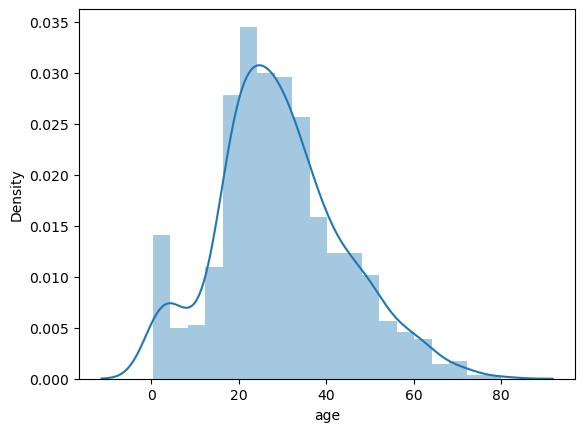

In [11]:
sns.distplot(df["age"])

In [12]:
df.age.isnull().sum()

177

In [15]:
df['age_mean']=df['age'].fillna(df['age'].mean())

In [16]:
df[['age_mean','age']]

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [17]:
##median value impution

In [23]:
df['age_median']=df['age'].fillna(df['age'].median())

In [24]:
df[['age_median','age_mean','age']]

,age_median,age_mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


##mode value imputation

In [26]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,median,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0,62.0


In [27]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [30]:
df[df['age'].notna()]['embarked'].mode()[0]

'S'

In [31]:
mode=df[df['age'].notna()]['embarked'].mode()[0]

In [32]:
mode

'S'

In [38]:
df['embarked_mode']=df['embarked'].fillna(mode)

In [39]:
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [40]:
df['embarked_mode'].isnull().sum()

0

Que3:explain the imbalanced data. what will happen if imbalanced data is not handled?

Ans: A classification data set with skewed class proportions is called imbalanced. classes that make up a large proportions of the data set are called majority classes . those that make  up a samller proportion are minority classes.

it means the model fails to identify the minority class yet the accuracy score of the model will be 95%. thus our traditional approach of classification and model accuracy calculation is not useful in the case of the imbalanced dataset.

Que4: what are Up-sampling and down-sampling ? exaplain with an example when up-sampling and doen sampling are required.

Ans:Ans: upsampling is the process of inserting zero-valued sample between original samples to increase the sampling rate. Doen-sampling is the process of reducing the sampling rate of a singnal. downsample reduse the sampling rate of the input AOs by an integer factor by picking up one out of N samples.

Que5: what is data agumentation? explim SMOTE.

Ans: data agumentation is a processof artificial increasing the amount of data by generating new data points from existing data.

SMOTE is an over-sampling technique focused on generating synthetic tabular data. the general idea of SMOTE is the generation of synthetic data between each sample of the minority class and its "k" nearest nighbors.

Que6: what is outlier in dataset? why is it essential to handel outliers?

Ans: outliers are extreme values that differ from most other data points in a dataset.it canhave a sinificant impact on many statistical methodss, suchas mean, variance,etc., and the performance of the ML models.

Que7:list down tecgnique used to handel missing data.

Ans: Mean,Mode,Median is one of the most common methods of imputing values when dealing and missing data